# Выбор локации для скважины

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Также необходимо проанализировать возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Гипотезы исследования и исследовательские вопросы

Главной **задачей** данного проекта стало построение модели машинного обучения для добывающей компании «ГлавРосГосНефть» для прогноза объема добычи нефти, на основе некоторых данных. Модель поможет определить, каков самый прибыльный регион, где следует пробурить новую скважину.

# Предоставленные заказчиком данные

Для анализа предоставлены 3 набора данных по 3 разным регионам.
Каждый объект в наборе данных — это информация о некоторых признаках скважины. Известно:  
- *id* — уникальный идентификатор скважины;
- *f0, f1, f2* — три признака точек (неважно, что они означают, но сами признаки значимы);
- *product* — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

Для начала следует импортировать необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

Далее можно приступить к обработке каждого необходимого датасета георазведки.

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [4]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Далее следует более детально рассмотреть имеющиеся наборы данных

In [5]:
print(geo_data_0.info())
print(geo_data_1.info())
print(geo_data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

Теперь проверим датасеты на дубликаты

In [6]:
geo_data_0.duplicated().sum()

0

In [7]:
geo_data_1.duplicated().sum()

0

In [8]:
geo_data_2.duplicated().sum()

0

**Вывод:** дубликаты не обнаружены ни в одном из наборов данных

Однако, стоит проверить на скрытые дубликаты по id скважины

In [9]:
geo_data_0['id'].value_counts()

74z30    2
QcMuo    2
HZww2    2
fiKDv    2
A5aEY    2
        ..
kPTPo    1
6eprc    1
FnUMW    1
GLIXL    1
ehvt7    1
Name: id, Length: 99990, dtype: int64

In [10]:
geo_data_0 = geo_data_0.drop_duplicates (subset=['id'])
geo_data_0.shape[0]

99990

In [11]:
geo_data_1['id'].value_counts()

bfPNe    2
5ltQ6    2
LHZR0    2
wt4Uk    2
9qp5o    1
        ..
DM7PQ    1
9gDCU    1
rje8l    1
D75Aj    1
ruEPu    1
Name: id, Length: 99996, dtype: int64

In [12]:
geo_data_1 = geo_data_1.drop_duplicates (subset=['id'])
geo_data_1.shape[0]

99996

In [13]:
geo_data_2['id'].value_counts()

KUPhW    2
Vcm5J    2
VF7Jo    2
xCHr8    2
6lu5S    1
        ..
6pFVi    1
1TiJb    1
SQajn    1
Jn94O    1
A9MeJ    1
Name: id, Length: 99996, dtype: int64

In [14]:
geo_data_2 = geo_data_2.drop_duplicates (subset=['id'])
geo_data_2.shape[0]

99996

В актуальных задачах наименования скважин не являются нужными, поэтому от них можно избавиться.

In [15]:
geo_data_0 = geo_data_0.drop(columns = ['id'])
geo_data_1 = geo_data_1.drop(columns = ['id'])
geo_data_2 = geo_data_2.drop(columns = ['id'])

В исходнях данных стало слишком мало признаков, что может повлиять на качество предсказаний будущей модели. Поэтому решено ввести полиноминальные функции.

In [16]:
data_0 = geo_data_0
data_1 = geo_data_1
data_2 = geo_data_2

In [17]:
data_0['f0^2'] = data_0['f0']**2
data_0['f1^2'] = data_0['f1']**2
data_0['f2^2'] = data_0['f2']**2
data_0['f0*f1'] = data_0['f0']*data_0['f1']
data_0['f1*f2'] = data_0['f1']*data_0['f2']
data_0['f0*f2'] = data_0['f0']*data_0['f2']
data_0.head()

,f0,f1,f2,product,f0^2,f1^2,f2^2,f0*f1,f1*f2,f0*f2
0,0.705745,-0.497823,1.221170,105.280062,0.498076,0.247827,1.491256,-0.351336,-0.607926,0.861835
1,1.334711,-0.340164,4.365080,73.037750,1.781454,0.115712,19.053926,-0.454021,-1.484844,5.826122
2,1.022732,0.151990,1.419926,85.265647,1.045981,0.023101,2.016191,0.155446,0.215815,1.452204
3,-0.032172,0.139033,2.978566,168.620776,0.001035,0.019330,8.871855,-0.004473,0.414118,-0.095825
4,1.988431,0.155413,4.751769,154.036647,3.953858,0.024153,22.579310,0.309027,0.738485,9.448565


In [18]:
data_1['f0^2'] = data_1['f0']**2
data_1['f1^2'] = data_1['f1']**2
data_1['f2^2'] = data_1['f2']**2
data_1['f0*f1'] = data_1['f0']*data_1['f1']
data_1['f1*f2'] = data_1['f1']*data_1['f2']
data_1['f0*f2'] = data_1['f0']*data_1['f2']
data_1.head()

,f0,f1,f2,product,f0^2,f1^2,f2^2,f0*f1,f1*f2,f0*f2
0,-15.001348,-8.276000,-0.005876,3.179103,225.040447,68.492175,0.000035,124.151157,0.048630,0.088148
1,14.272088,-3.475083,0.999183,26.953261,203.692490,12.076203,0.998366,-49.596693,-3.472243,14.260424
2,6.263187,-5.948386,5.001160,134.766305,39.227516,35.383293,25.011603,-37.255855,-29.748830,31.323203
3,-13.081196,-11.506057,4.999415,137.945408,171.117696,132.389345,24.994149,150.512988,-57.523552,-65.398328
4,12.702195,-8.147433,5.004363,134.766305,161.345755,66.380671,25.043645,-103.490287,-40.772710,63.566388


In [19]:
data_2['f0^2'] = data_2['f0']**2
data_2['f1^2'] = data_2['f1']**2
data_2['f2^2'] = data_2['f2']**2
data_2['f0*f1'] = data_2['f0']*data_2['f1']
data_2['f1*f2'] = data_2['f1']*data_2['f2']
data_2['f0*f2'] = data_2['f0']*data_2['f2']
data_2.head()

,f0,f1,f2,product,f0^2,f1^2,f2^2,f0*f1,f1*f2,f0*f2
0,-1.146987,0.963328,-0.828965,27.758673,1.315579,0.928001,0.687183,-1.104925,-0.798565,0.950812
1,0.262778,0.269839,-2.530187,56.069697,0.069052,0.072813,6.401844,0.070908,-0.682743,-0.664877
2,0.194587,0.289035,-5.586433,62.871910,0.037864,0.083541,31.208231,0.056243,-1.614675,-1.087049
3,2.236060,-0.553760,0.930038,114.572842,4.999963,0.306650,0.864970,-1.238240,-0.515018,2.079620
4,-0.515993,1.716266,5.899011,149.600746,0.266249,2.945567,34.798336,-0.885581,10.124270,-3.043848


На данном этапе следует визуализировать информацию для более наглядной демонстрации особенностей признаков и целевого признака.

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>,
        <AxesSubplot:title={'center':'f2'}>],
       [<AxesSubplot:title={'center':'product'}>,
        <AxesSubplot:title={'center':'f0^2'}>,
        <AxesSubplot:title={'center':'f1^2'}>],
       [<AxesSubplot:title={'center':'f2^2'}>,
        <AxesSubplot:title={'center':'f0*f1'}>,
        <AxesSubplot:title={'center':'f1*f2'}>],
       [<AxesSubplot:title={'center':'f0*f2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

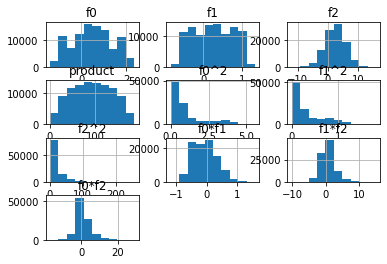

In [20]:
data_0.hist()

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>,
        <AxesSubplot:title={'center':'f2'}>],
       [<AxesSubplot:title={'center':'product'}>,
        <AxesSubplot:title={'center':'f0^2'}>,
        <AxesSubplot:title={'center':'f1^2'}>],
       [<AxesSubplot:title={'center':'f2^2'}>,
        <AxesSubplot:title={'center':'f0*f1'}>,
        <AxesSubplot:title={'center':'f1*f2'}>],
       [<AxesSubplot:title={'center':'f0*f2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

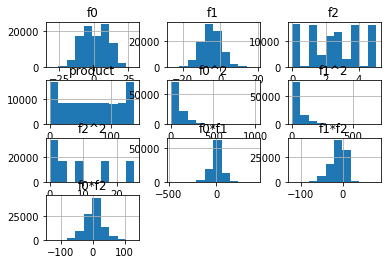

In [21]:
data_1.hist()

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>,
        <AxesSubplot:title={'center':'f2'}>],
       [<AxesSubplot:title={'center':'product'}>,
        <AxesSubplot:title={'center':'f0^2'}>,
        <AxesSubplot:title={'center':'f1^2'}>],
       [<AxesSubplot:title={'center':'f2^2'}>,
        <AxesSubplot:title={'center':'f0*f1'}>,
        <AxesSubplot:title={'center':'f1*f2'}>],
       [<AxesSubplot:title={'center':'f0*f2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

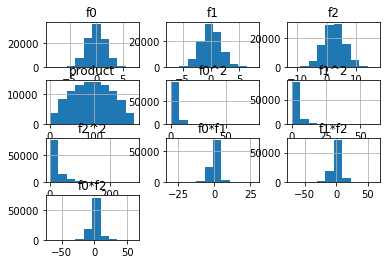

In [22]:
data_2.hist()

В 3х наборах данных по регионах остались только колличественные признаки. Следует проверить диапазон их значений.

In [23]:
razn_f0_0 = data_0['f0'].max() - data_0['f0'].min()
razn_f0_0

3.77093611688122

In [24]:
razn_f1_0 = data_0['f1'].max() - data_0['f1'].min()
razn_f1_0

2.1919878308127134

In [25]:
razn_f2_0 = data_0['f2'].max() - data_0['f2'].min()
razn_f2_0

28.092118125758724

In [26]:
razn_f0_1 = data_1['f0'].max() - data_1['f0'].min()
razn_f0_1

61.031330633071406

In [27]:
razn_f1_1 = data_1['f1'].max() - data_1['f1'].min()
razn_f1_1

45.09266064207663

In [28]:
razn_f2_1 = data_1['f2'].max() - data_1['f2'].min()
razn_f2_1

5.037864641936482

In [29]:
razn_f0_2 = data_2['f0'].max() - data_2['f0'].min()
razn_f0_2

15.998266104007811

In [30]:
razn_f1_2 = data_2['f1'].max() - data_2['f1'].min()
razn_f1_2

14.928821030951504

In [31]:
razn_f2_2 = data_2['f2'].max() - data_2['f2'].min()
razn_f2_2

28.70973660017651

Чтобы какой-то признак не воспринимался моделью как более значимый из-за более широкого диапазона и в принципе более высоких значений, следует их масштабировать методом стандартизации данных наборы данных по 3м регионам. 

In [32]:
data_train_0, data_val_0 = train_test_split(data_0, test_size=0.25, random_state=12345)
data_train_1, data_val_1 = train_test_split(data_1, test_size=0.25, random_state=12345)
data_train_2, data_val_2 = train_test_split(data_2, test_size=0.25, random_state=12345)

In [33]:
features_train_0 = data_train_0.drop(columns = ['product'])
target_train_0 = data_train_0['product']

features_val_0 = data_val_0.drop(columns = ['product'])
target_val_0 = data_val_0['product']

In [34]:
features_train_1 = data_train_1.drop(columns = ['product'])
target_train_1 = data_train_1['product']

features_val_1 = data_val_1.drop(columns = ['product'])
target_val_1 = data_val_1['product']

In [35]:
features_train_2 = data_train_2.drop(columns = ['product'])
target_train_2 = data_train_2['product']

features_val_2 = data_val_2.drop(columns = ['product'])
target_val_2 = data_val_2['product']

In [36]:
scaler = StandardScaler()
scaler.fit(features_train_0)
features_train_0 = scaler.transform(features_train_0)
features_val_0 = scaler.transform(features_val_0)

print(features_train_0.shape)
print(features_val_0.shape)

(74992, 9)
(24998, 9)


In [37]:
scaler = StandardScaler()
scaler.fit(features_train_1)
features_train_1 = scaler.transform(features_train_1)
features_val_1 = scaler.transform(features_val_1)

print(features_train_1.shape)
print(features_val_1.shape)

(74997, 9)
(24999, 9)


In [38]:
scaler = StandardScaler()
scaler.fit(features_train_2)
features_train_2 = scaler.transform(features_train_2)
features_val_2 = scaler.transform(features_val_2)

print(features_train_2.shape)
print(features_val_2.shape)

(74997, 9)
(24999, 9)


**Вывод:** в ходе этапа загрузки и первичного анализа исходных данных по 3м регионам было обнаружено:  
- отсутствие пропусков  
- отсутсвие явных дубликатов 
- присутствие неявных дубликатов  
- нормальное распределение данных в 1 и 3 регионе  
- во 2 регионе присутсвуют несколько пиков в данных по признаку f2 и объему добычи нефти (в последнем чаще встречаются значения близкие к 0 и больше 100 тыс.)

Так же было произведено удаление неявных признаков, столбца с наименованиями скважин в 3х регионах, масштабирование признаков для модели линейной регрессии, а также введение новых признаков для улучшения качества будущей модели.

## Обучение и проверка модели

На данном этапе следует обучить предсказывать объем добычи нефти и проверить модель по каждому региону. Для актуальных задач и типа признаков подходит модель линейной регрессии.

In [39]:
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predict_0 = model_0.predict(features_val_0)
print('Средний запас сырья в этом регионе:', target_val_0.mean())
print('RMSE модели на валидационной выборке:', (mean_squared_error(target_val_0, predict_0)**0.5))

Средний запас сырья в этом регионе: 92.15820490940044
RMSE модели на валидационной выборке: 37.852894865659074


In [40]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predict_1 = model_1.predict(features_val_1)
print('Средний запас сырья в этом регионе:', target_val_1.mean())
print('RMSE модели на валидационной выборке:', (mean_squared_error(target_val_1, predict_1)**0.5))

Средний запас сырья в этом регионе: 69.18604400957675
RMSE модели на валидационной выборке: 0.8921493353000904


In [41]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predict_2 = model_2.predict(features_val_2)
print('Средний запас сырья в этом регионе:', target_val_2.mean())
print('RMSE модели на валидационной выборке:', (mean_squared_error(target_val_2, predict_2)**0.5))

Средний запас сырья в этом регионе: 94.7851093536914
RMSE модели на валидационной выборке: 38.81679016867149


Сложно оценить, насколько данный показатель RMSE приемлем для данных выборок, поэтому я введу бейзлайн

In [42]:
dummy_mean_0 = DummyRegressor(strategy = 'mean').fit(features_train_0, target_train_0)
predict_dum_0 = dummy_mean_0.predict(features_val_0)
print('RMSE модели на валидационной выборке:', (mean_squared_error(target_val_0, predict_0)**0.5))

RMSE модели на валидационной выборке: 37.852894865659074


In [43]:
dummy_mean_1 = DummyRegressor(strategy = 'mean').fit(features_train_1, target_train_1)
predict_dum_1 = dummy_mean_1.predict(features_val_1)
print('RMSE модели на валидационной выборке:', (mean_squared_error(target_val_1, predict_1)**0.5))

RMSE модели на валидационной выборке: 0.8921493353000904


In [44]:
dummy_mean_2 = DummyRegressor(strategy = 'mean').fit(features_train_2, target_train_2)
predict_dum_2 = dummy_mean_2.predict(features_val_2)
print('RMSE модели на валидационной выборке:', (mean_squared_error(target_val_2, predict_2)**0.5))

RMSE модели на валидационной выборке: 38.81679016867149


**Вывод:** На данном этапе было обучено 3 модели линейной регрессии (по каждому региону добычи) для того, чтобы предсказать объем добытой нефти. Корень из среднеквадратической ошибки вычислений модели оказался различным для каждого региона - в 1м она составила приблизительно 38 тысяч баррелей, во 2м и 3м  0.9 и 39 тысяч соответственно. Поскольку RMSE у модели линейной регрессии и дамми регрессии разные, а точнее RMSE у модели линейной регрессии меньше, поэтому можно можно считать, что RMSE у модели линейной регрессии можно считать приемлемым. Однако, на основании фактов можно сделать вывод, что во 2м регионе модель справилась лучше всего. 

## Подготовка к расчёту прибыли

На данном этапе я планирую ввести константные значения показателей, которые будут нужны для рассчета прибыли и рисков:  
- бюджет на разработку скважин в регионе  
- доход с одной единицы продукта  
- заданное количество скважин в регионе  
- количество лучших скважин. 
- количество выборок для Bootstrap
- критическая вероятность убытков

In [45]:
BUDGET = 10_000_000_000
TH_BUR = 450_000
ITOG_SKVAG = 200
NUMBER = 500
ITERATIONS = 1000
CRIT = 0.025

In [46]:
#достаточный объём сырья для безубыточной разработки новой скважины
POROG = BUDGET/ITOG_SKVAG/TH_BUR
POROG

111.11111111111111

**Вывод:** чтобы новая скважина была безубыточна - нужно, чтобы она производила 111 тыс баррелей нефти.

Теперь стоит сравнить средний запас каждого региона и оценить, насколько скважина безубыточна в том или ином регионе. 

In [47]:
predict_0.mean()

92.79073462772622

In [48]:
predict_1.mean()

69.17825040751332

In [49]:
predict_2.mean()

94.78182766102707

**Вывод:** ни один из регионов не удовлетворяет условию безубыточности - средний запас нефти меньше, чем 111 баррелей. Однако, следует дальше поссмотреть на то, какой доход они принесут и рассчитать прибыль и риски на следуеющем этапе.

## Расчёт прибыли и рисков 

Далее я создам функцию рассчета прибыли, которая принимает на вход таргетные значения объема нефти, предсказанные значения и нужное количество скважин

In [50]:
state = np.random.RandomState(12345)
def razn(target, predict):
    predict = pd.Series(predict, index=target.index)
    predict = predict.sample(NUMBER,replace = True, random_state=state)
    sort_predict = predict.sort_values(ascending = False)
    product_sum = target[sort_predict.index][:ITOG_SKVAG].sum()
    fin_prod = product_sum*TH_BUR
    is_win = fin_prod - BUDGET
    return product_sum, is_win

Далее я рассчитаю примерную прибыль в каждом регионе.

In [51]:
print('Объем производимого сырья в 1 регионе', razn(target_val_0, predict_0)[0])
print('Прибыль в 1 регионе', razn(target_val_0, predict_0)[1])

Объем производимого сырья в 1 регионе 23749.157138100203
Прибыль в 1 регионе 276226098.6587887


In [52]:
print('Объем производимого сырья в 2 регионе', razn(target_val_1, predict_1)[0])
print('Прибыль в 2 регионе', razn(target_val_1, predict_1)[1])

Объем производимого сырья в 2 регионе 23234.678562147317
Прибыль в 2 регионе 426371431.3859291


In [53]:
print('Объем производимого сырья в 3 регионе', razn(target_val_2, predict_2)[0])
print('Прибыль в 3 регионе', razn(target_val_2, predict_2)[1])

Объем производимого сырья в 3 регионе 22693.74735758098
Прибыль в 3 регионе 602103859.458952


In [54]:
def bootstrap(target, predict, iterations, number):
    for_boostrap = []
    for i in range(iterations):
        for_boostrap.append(razn(target, predict)[1])
    for_boostrap = pd.Series(for_boostrap)
    mean_income = for_boostrap.mean()
    lower = for_boostrap.quantile(0.025)
    ceil_q = for_boostrap.quantile(0.975)
    risk = (for_boostrap[for_boostrap < 0].count() / for_boostrap.count()) * 100
    print('Средняя прибыль:', round(mean_income, 1))
    print('Нижняя граница:', round(lower, 1))
    print('Верхняя граница:', round(ceil_q, 1))
    print('Риск убытков:', risk, '%')
    return for_boostrap

In [55]:
bootstrap(target_val_0, predict_0, ITERATIONS, ITOG_SKVAG)

Средняя прибыль: 378836717.9
Нижняя граница: -142318212.3
Верхняя граница: 893205230.4
Риск убытков: 7.6 %


0      4.622369e+08
1      7.321594e+08
2      7.870180e+08
3      2.141406e+08
4      4.106207e+08
           ...     
995    4.835627e+08
996    6.291683e+08
997    1.629624e+08
998   -9.331378e+07
999   -9.959520e+07
Length: 1000, dtype: float64

In [56]:
bootstrap(target_val_1, predict_1, ITERATIONS, ITOG_SKVAG)

Средняя прибыль: 479464524.8
Нижняя граница: 75279808.2
Верхняя граница: 917953817.7
Риск убытков: 0.6 %


0      5.576131e+08
1      2.900916e+08
2      6.468076e+08
3      6.816259e+07
4      6.945771e+08
           ...     
995    4.527442e+08
996    4.912459e+08
997    6.125355e+08
998    4.626961e+08
999    4.727103e+08
Length: 1000, dtype: float64

In [57]:
bootstrap(target_val_2, predict_2, ITERATIONS, ITOG_SKVAG)

Средняя прибыль: 531599512.1
Нижняя граница: -4566533.4
Верхняя граница: 997263380.2
Риск убытков: 2.7 %


0      4.272217e+08
1      7.479210e+08
2      6.381898e+08
3      3.471525e+08
4      4.229478e+08
           ...     
995    4.711911e+08
996    5.699326e+08
997    4.184758e+08
998    8.872748e+08
999    8.559566e+07
Length: 1000, dtype: float64

**Вывод:** 
- На основании подготовленной модели линейной регрессии с введенными полиноминальными признаками было совершено предсказание объема производства баррелей нефти. По метрике качества модели предсказания RMSE победила 2 модель - её результаты предсказаний отличаются от рельных меньше.  
- По средней прибыли за добычу нефти регионы распределились следующим образом: 3 регион имеет самую высокую прибыль, 2 регион имеет среднюю прибыльность, а 1 самую худшую.
- После проведенного бутстрапинга были посчитаны риски: 1 регион будет иметь отрицательную прибыль с вероятностью 7,6%, 2 регион с вероятностью 0,6%, а 3 регион с вероятностью 2,7%

Заказчик указал желательный процент рисков отрицательной прибыли 2,5% и поэтому в качестве самого выгодного региона для добычи нефти стоит предложить 2 регион - на основании более точной модели было предсказана средняя прибыль 479464524,8 с риском отрицательной прибыли в 0,6%